In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Переобученность модели

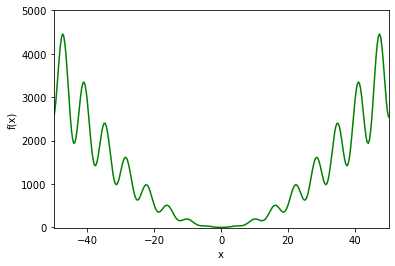

In [9]:
def f(x):
    return (x**2)*(np.sin(0.5*x)**2+1)
dots = np.linspace(-50, 50, 300)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-10, 5000)
plt.xlim(-50,50)

plt.plot(dots, f(dots), color='g')

In [22]:
np.random.seed(16)
x_data = np.random.uniform(-50, 50, 100)
f_data = [f(i) for i in x_data] + np.random.uniform(-1000, 1000, 100)

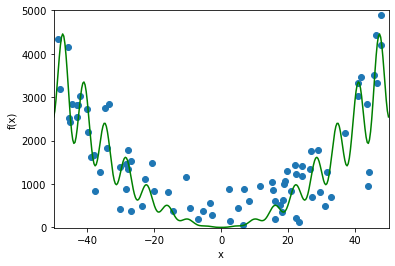

In [23]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-10, 5000)
plt.xlim(-50,50)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

In [58]:
def generate_features(x, max_power):
    x=x[:, np.newaxis]
    return np.concatenate([x**i for i in range(1, max_power+1)], axis=1)

In [59]:
generate_features(x_data, 6)

array([[-2.76708921e+01,  7.65678269e+02, -2.11870007e+04,
         5.86263211e+05, -1.62224261e+07,  4.48889001e+08],
       [ 2.31633414e+00,  5.36540385e+00,  1.24280681e+01,
         2.87875585e+01,  6.66816045e+01,  1.54456877e+02],
       [ 5.07014566e+00,  2.57063770e+01,  1.30335076e+02,
         6.60817818e+02,  3.35044259e+03,  1.69872320e+04],
       [-4.54398050e+01,  2.06477588e+03, -9.38230132e+04,
         4.26329942e+06, -1.93723494e+08,  8.80275781e+09],
       [-1.39271165e+01,  1.93964573e+02, -2.70136720e+03,
         3.76222556e+04, -5.23969535e+05,  7.29738474e+06],
       [-2.76919058e+01,  7.66841649e+02, -2.12353067e+04,
         5.88046114e+05, -1.62841176e+07,  4.50938251e+08],
       [ 1.88726162e+01,  3.56175642e+02,  6.72196618e+03,
         1.26861088e+05,  2.39420062e+06,  4.51848293e+07],
       [-3.36268575e+01,  1.13076555e+03, -3.80240919e+04,
         1.27863072e+06, -4.29963330e+07,  1.44583156e+09],
       [-4.29675133e+01,  1.84620720e+03, -7.932

In [74]:
# from sklearn import linear_model
from sklearn.linear_model import Ridge

# создадим модель
linear_regressor = Ridge(alpha = 1.0)

# обучим ее
x1=generate_features(x_data, 6)
linear_regressor.fit(x1, f_data)

C:\Users\agvor\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.16756e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge()

In [75]:
linear_regressor.predict(x1)

array([ 1.09977140e+03, -6.19806360e+00,  8.07271687e+01,  3.08882570e+03,
        1.72014351e+02,  1.10143913e+03,  7.17918052e+02,  1.59536789e+03,
        2.65250288e+03,  3.02769371e+03,  1.30179010e+02,  2.53684508e+03,
        8.64684474e+02,  1.64245924e+03,  8.89599325e+02,  5.74105015e+02,
        7.53424344e+02, -8.76024086e+01,  1.16543250e+03, -8.02312631e+01,
        2.00701737e+03,  2.40788450e+03,  1.41312253e+02, -8.60681640e+01,
        4.33689073e+02,  3.13698271e+03,  9.82288735e+02,  5.46962738e+01,
        1.03867688e+03,  1.13057935e+03,  2.62313975e+03,  5.81083892e+02,
        2.94131044e+03,  7.00972728e+02, -7.69555969e+01, -8.72302725e+01,
        5.87595587e+02,  7.23557904e+02,  7.91173141e+02,  3.90946835e+03,
        1.05445783e+03,  1.24791062e+03,  1.81740940e+03,  1.89875679e+02,
        2.76856767e+02,  1.02938006e+03,  1.29870832e+03,  7.30863818e+02,
        4.46994012e+03,  1.16248985e+03,  1.93335997e+02,  3.71752913e+03,
        3.70202839e+02,  

In [76]:
linear_regressor.coef_

array([ 1.68913749e+01,  2.21304432e+00, -3.24040959e-02, -1.32204412e-03,
        1.27598596e-05,  5.01159846e-07])

In [77]:
linear_regressor.intercept_

-56.758158094887904

In [78]:
def play_model(_x, model):
    data=generate_features(_x, len(model.coef_))
    return (data.dot(model.coef_[:, np.newaxis])+model.intercept_).flatten()

In [79]:
play_model(x_data, linear_regressor)

array([ 1.09977140e+03, -6.19806360e+00,  8.07271687e+01,  3.08882570e+03,
        1.72014351e+02,  1.10143913e+03,  7.17918052e+02,  1.59536789e+03,
        2.65250288e+03,  3.02769371e+03,  1.30179010e+02,  2.53684508e+03,
        8.64684474e+02,  1.64245924e+03,  8.89599325e+02,  5.74105015e+02,
        7.53424344e+02, -8.76024086e+01,  1.16543250e+03, -8.02312631e+01,
        2.00701737e+03,  2.40788450e+03,  1.41312253e+02, -8.60681640e+01,
        4.33689073e+02,  3.13698271e+03,  9.82288735e+02,  5.46962738e+01,
        1.03867688e+03,  1.13057935e+03,  2.62313975e+03,  5.81083892e+02,
        2.94131044e+03,  7.00972728e+02, -7.69555969e+01, -8.72302725e+01,
        5.87595587e+02,  7.23557904e+02,  7.91173141e+02,  3.90946835e+03,
        1.05445783e+03,  1.24791062e+03,  1.81740940e+03,  1.89875679e+02,
        2.76856767e+02,  1.02938006e+03,  1.29870832e+03,  7.30863818e+02,
        4.46994012e+03,  1.16248985e+03,  1.93335997e+02,  3.71752913e+03,
        3.70202839e+02,  

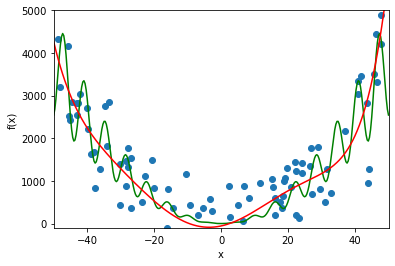

In [80]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-100, 5000)
plt.xlim(-50,50)

plt.plot(dots, f(dots), color='g')
plt.plot(dots, play_model(dots, linear_regressor), color='r')
plt.scatter(x_data, f_data)

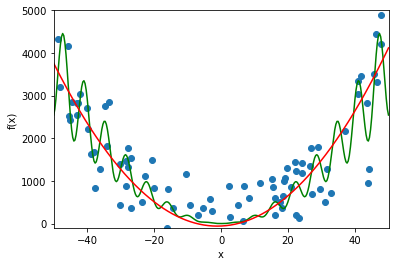

In [81]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-100, 5000)
plt.xlim(-50,50)
model = linear_model.LinearRegression()
model.fit(generate_features(x_data, 2), f_data)
plt.plot(dots, f(dots), color='g')
plt.plot(dots, play_model(dots, model), color='r')
plt.scatter(x_data, f_data)

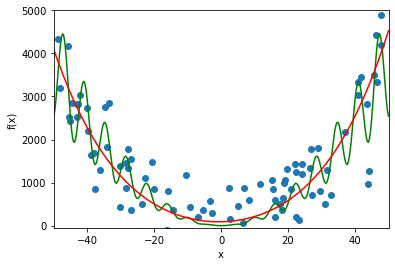

In [82]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-50, 5000)
plt.xlim(-50,50)
model = linear_model.LinearRegression()
model.fit(generate_features(x_data, 4), f_data)
plt.plot(dots, f(dots), color='g')
plt.plot(dots, play_model(dots, model), color='r')
plt.scatter(x_data, f_data)

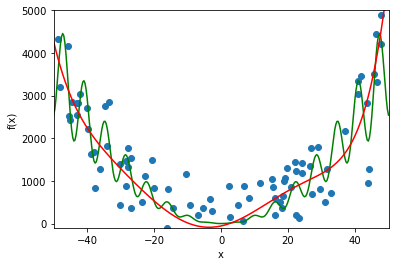

In [85]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-100, 5000)
plt.xlim(-50,50)
model = linear_model.LinearRegression()
model.fit(generate_features(x_data, 6), f_data)
plt.plot(dots, f(dots), color='g')
plt.plot(dots, play_model(dots, model), color='r')
plt.scatter(x_data, f_data)

<b>Домашнее задание: </b>Модифицировать реализацию линейной регрессии из предыдущего урока, добавив l2 регулярязационную поправку к штрафной функции: $ +c*\sum \limits _{j}  w_{j}^2 $ и соответствующую к выражению для производной. Опробовать реализацию на примере с полиномиальными фичами 6го порядка из данного урока. При каком значении С в воспроизводимой функции не будет воспроизводить несуществующий минимум в окрестностях x=7,5?